# Temat 2
### Autor: Tomasz Tokarczyk

In [ ]:
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [2]:
with codecs.open("data.csv", "r",encoding='utf-8', errors='ignore') as file_data:
    data = pd.read_csv(file_data)

In [3]:
data = data.drop(columns=["ID", "LoggedIn"])

In [4]:
pd.set_option('display.max_columns', None)

# Opis danych

* ID - Unique ID (can not be used for predictions)
* Gender- Sex
* City - Current City
* Monthly_Income - Monthly Income in rupees
* DOB - Date of Birth
* Lead_Creation_Date - Lead Created on date
* Loan_Amount_Applied - Loan Amount Requested (INR)
* Loan_Tenure_Applied - Loan Tenure Requested (in years)
* Existing_EMI - EMI of Existing Loans (INR)
* Employer_Name - Employer Name
* Salary_Account- Salary account with Bank
* Mobile_Verified - Mobile Verified (Y/N)
* Var5- Continuous classified variable
* Var1- Categorical variable with multiple levels
* Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
* Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
* Interest_Rate- Interest Rate of Submitted Loan Amount
* Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
* EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
* Filled_Form- Filled Application form post quote
* Device_Type- Device from which application was made (Browser/ Mobile)
* Var2- Categorical Variable with multiple Levels
* Source- Categorical Variable with multiple Levels
* Var4- Categorical Variable with multiple Levels

In [5]:
data

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,Mobile_Verified,Var5,Var1,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,N,0,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,Y,13,HBXA,200000.0,2.0,13.25,NaN,6762.90,N,Web-browser,G,S122,3,0
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,Y,0,HBXX,450000.0,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,Y,10,HBXX,920000.0,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,Y,17,HBXX,500000.0,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,Female,Ajmer,71901,27-Nov-69,31-Jul-15,1000000.0,5.0,14500.0,MAYO COLLEGE,ICICI Bank,N,9,HBXX,NaN,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,3,0
87016,Female,Kochi,16000,01-Dec-90,31-Jul-15,0.0,0.0,0.0,KERALA COMMUNICATORS CABLE LTD,Federal Bank,Y,1,HBXB,240000.0,4.0,35.50,4800.0,9425.76,Y,Mobile,G,S122,5,0
87017,Male,Bengaluru,118000,28-Jan-72,31-Jul-15,0.0,0.0,0.0,BANGALORE INSTITUTE OF TECHNOLOGY,Syndicate Bank,Y,8,HBXX,1200000.0,4.0,NaN,NaN,NaN,N,Mobile,G,S122,3,0
87018,Male,Bengaluru,98930,27-Apr-77,31-Jul-15,800000.0,5.0,13660.0,FIRSTSOURCE SOLUTION LTD,ICICI Bank,Y,18,HBXX,800000.0,5.0,NaN,NaN,NaN,N,Web-browser,G,S122,3,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 87020 non-null  object 
 1   City                   86017 non-null  object 
 2   Monthly_Income         87020 non-null  int64  
 3   DOB                    87020 non-null  object 
 4   Lead_Creation_Date     87020 non-null  object 
 5   Loan_Amount_Applied    86949 non-null  float64
 6   Loan_Tenure_Applied    86949 non-null  float64
 7   Existing_EMI           86949 non-null  float64
 8   Employer_Name          86949 non-null  object 
 9   Salary_Account         75256 non-null  object 
 10  Mobile_Verified        87020 non-null  object 
 11  Var5                   87020 non-null  int64  
 12  Var1                   87020 non-null  object 
 13  Loan_Amount_Submitted  52407 non-null  float64
 14  Loan_Tenure_Submitted  52407 non-null  float64
 15  In

In [7]:
data.nunique()

Gender                       2
City                       697
Monthly_Income            5825
DOB                      11345
Lead_Creation_Date          92
Loan_Amount_Applied        277
Loan_Tenure_Applied         11
Existing_EMI              3753
Employer_Name            43566
Salary_Account              57
Mobile_Verified              2
Var5                        19
Var1                        19
Loan_Amount_Submitted      203
Loan_Tenure_Submitted        6
Interest_Rate               73
Processing_Fee             571
EMI_Loan_Submitted        4530
Filled_Form                  2
Device_Type                  2
Var2                         7
Source                      30
Var4                         8
Disbursed                    2
dtype: int64

# Data urodzenia

In [8]:
# W Kolumnie DOB znajduje się data urodzenia w formie str natomiast w kolumnie Lead_Creation_Date znajduje się data kontaktu
data[["DOB"]].values[0][0]

'23-May-78'

In [9]:
# Zamienimy obie kolumny na format datetime oraz obliczymy wiek w momencie kontaktu
data["DOB"] = pd.to_datetime(data["DOB"])
data["Lead_Creation_Date"] = pd.to_datetime(data["Lead_Creation_Date"])
data["Age"] = (data["Lead_Creation_Date"] - data["DOB"]).astype('<m8[Y]')

In [10]:
# W zbiorze znajdują się rekordy z wiekiem ujemnym,
# prawdopodobnie źle wypełniono pierwsze dwie cyfry dla roku narodzin (zamiast 1969, 2069)
# W takich przypadkach dodamy 100
data.loc[data["Age"] <= 0, "Age"] = data["Age"] + 100

In [11]:
data = data.drop(columns=["Lead_Creation_Date", "DOB"])

/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

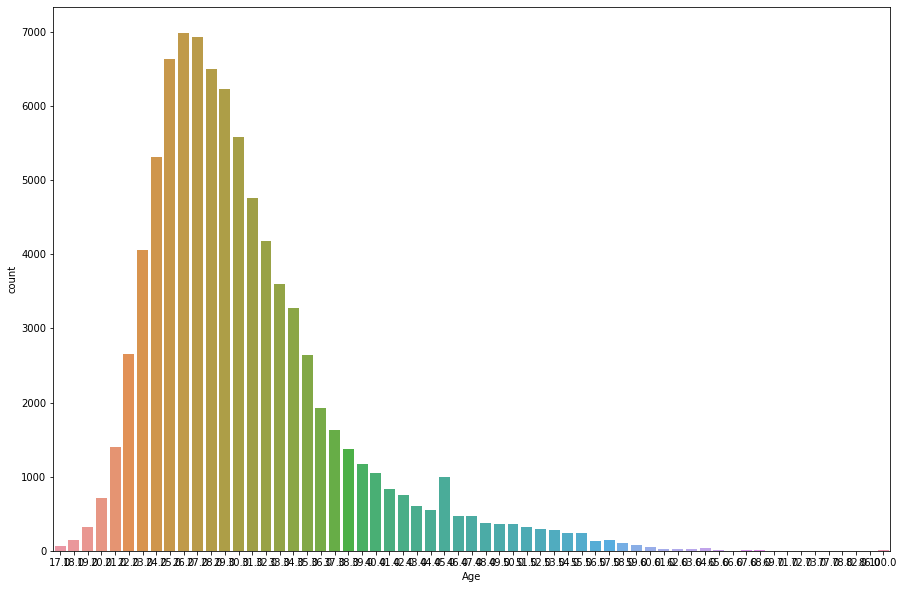

In [12]:
# Rozkład wieku
plt.subplots(figsize=(15,10))
sns.countplot('Age',data=data)

# Brakujące wartości

<AxesSubplot:>

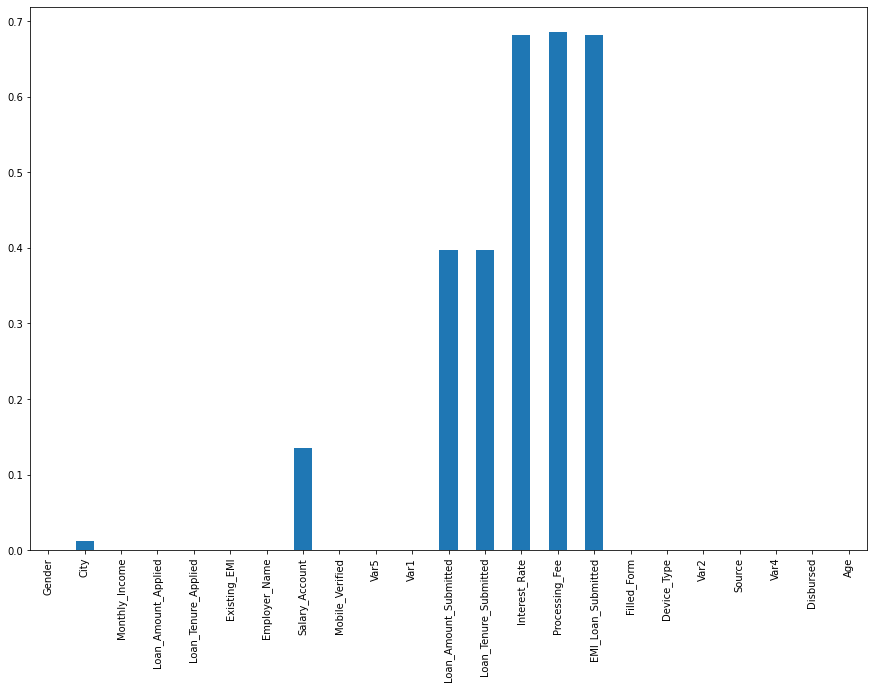

In [13]:
# Procentowo
plt.subplots(figsize=(15,10))
(data.isnull().sum() / len(data)).plot(kind='bar')

In [14]:
# Dzielimy zbiór na treningowy i testowy
X = data.drop(columns=["Disbursed"])
y = data["Disbursed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

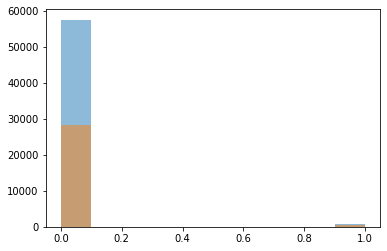

In [15]:
# Klasy są mocno niezbalansowane
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [16]:
# Przygotowanie zbioru z oversamplingiem (Dosamplowanie rekordów mniej licznej klasy dla zbalansowania klas)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [17]:
y_over.value_counts()

1    85747
0    85747
Name: Disbursed, dtype: int64

In [18]:
# Dzielenie samplowanego zbioru na zbiór treningowy i testowy
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.33, random_state=42)

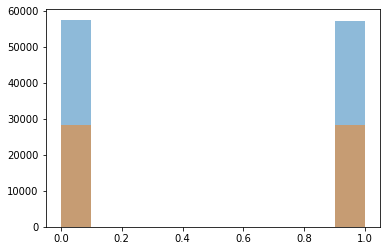

In [19]:
plt.hist(y_train_over, alpha=0.5)
plt.hist(y_test_over, alpha=0.5)
plt.show()

In [20]:
# Zhashuję wartości w kolumnie Employer_Name (zmienna kategoryczna z dużą ilością warstw).
# Jest w niej 43566 unikalnych rekordów w formie stringów.
hash_features = data["Employer_Name"].nunique()

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import murmurhash3_32

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

class HashCategorical(TransformerMixin):
    
    def __init__(self, k=hash_features):
        self.k = k
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #na każdej obserwacji w X zastosować funkcję murmurhash3_32
        X_transformed = X.applymap(lambda x: murmurhash3_32(str(x)) % self.k)
        return X_transformed 

# Preprocessing

In [22]:
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector([
            "Monthly_Income",
            "Loan_Tenure_Applied",
            "Loan_Tenure_Applied",
            "Existing_EMI",
            "Var5",
            "Loan_Amount_Submitted",
            "Loan_Tenure_Submitted",
            "Interest_Rate",
            "Interest_Rate",
            "Processing_Fee",
            "EMI_Loan_Submitted",
            "Var4"
        ])), ("imputer", SimpleImputer(strategy="median"))
])

In [23]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector([
            "City",
            "Gender",
            "Mobile_Verified",
            "Salary_Account",
            "Var1",
            "Filled_Form",
            "Device_Type",
            "Var2",
            "Source"
        ])),
        ("imputer", MostFrequentImputer()),
        ("feature_hasher", HashCategorical()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ])

hash_pipeline = Pipeline([
        ("select_cat", DataFrameSelector([
            "Employer_Name"
        ])),
        ("imputer", MostFrequentImputer()),
        ("feature_hasher", HashCategorical())
    ])

In [24]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
        ("hash_pipeline", hash_pipeline)
    ])

# Modelowanie

In [25]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [47]:
from sklearn.svm import LinearSVC

pipe = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', LinearSVC())])

param_grid = {
            'classifier__C': [0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, verbose=10)

grid_1.fit(X_train_over, y_train_over)
grid_1.best_params_
metrics.precision_score(y_test, grid_1.best_estimator_.predict(X_test), average='weighted')

TypeError: __init__() got an unexpected keyword argument 'probability'

In [ ]:
from sklearn.svm import SVC
pipe_2 = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', SVC(class_weight="balanced"))])

param_grid_2 = {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__gamma': [0.1, 1, 10, 'auto']
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True, verbose=10)

grid_2.fit(X_train, y_train)
grid_2.best_params_
metrics.precision_score(y_test, grid_2.best_estimator_.predict(X_test), average='weighted')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] classifier__C=0.1, classifier__gamma=0.1 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [30]:
from sklearn.linear_model import LogisticRegression

pipe_3 = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', LogisticRegression())])

param_grid_3 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True, verbose=10)

grid_3.fit(X_train_over, y_train_over)
grid_3.best_params_
metrics.accuracy_score(y_test_over, grid_3.best_estimator_.predict(X_test_over))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] classifier__C=0.001 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier__C=0.001, score=(train=0.724, test=0.721), total=  19.6s
[CV] classifier__C=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.0s remaining:    0.0s


[CV]  classifier__C=0.001, score=(train=0.722, test=0.723), total=  19.0s
[CV] classifier__C=0.001 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.4s remaining:    0.0s


[CV]  classifier__C=0.001, score=(train=0.616, test=0.621), total=  16.5s
[CV] classifier__C=0.001 .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s


[CV]  classifier__C=0.001, score=(train=0.616, test=0.616), total=  15.9s
[CV] classifier__C=0.001 .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV]  classifier__C=0.001, score=(train=0.616, test=0.614), total=  16.2s
[CV] classifier__C=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min remaining:    0.0s
/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier__C=0.01, score=(train=0.723, test=0.718), total=  24.3s
[CV] classifier__C=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.1min remaining:    0.0s
/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier__C=0.01, score=(train=0.722, test=0.723), total=  25.5s
[CV] classifier__C=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.6min remaining:    0.0s


[CV]  classifier__C=0.01, score=(train=0.616, test=0.621), total=  16.1s
[CV] classifier__C=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.9min remaining:    0.0s


[CV]  classifier__C=0.01, score=(train=0.616, test=0.616), total=  16.0s
[CV] classifier__C=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.2min remaining:    0.0s


[CV]  classifier__C=0.01, score=(train=0.616, test=0.614), total=  15.2s
[CV] classifier__C=0.1 ...............................................


/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier__C=0.1, score=(train=0.727, test=0.724), total=  21.8s
[CV] classifier__C=0.1 ...............................................


/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier__C=0.1, score=(train=0.722, test=0.723), total=  23.2s
[CV] classifier__C=0.1 ...............................................
[CV]  classifier__C=0.1, score=(train=0.616, test=0.621), total=  17.8s
[CV] classifier__C=0.1 ...............................................
[CV]  classifier__C=0.1, score=(train=0.616, test=0.616), total=  19.8s
[CV] classifier__C=0.1 ...............................................
[CV]  classifier__C=0.1, score=(train=0.616, test=0.614), total=  18.4s
[CV] classifier__C=1 .................................................


/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . classifier__C=1, score=(train=0.633, test=0.629), total=  27.2s
[CV] classifier__C=1 .................................................


/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] . classifier__C=1, score=(train=0.722, test=0.723), total=  20.7s
[CV] classifier__C=1 .................................................
[CV] . classifier__C=1, score=(train=0.616, test=0.621), total=  13.5s
[CV] classifier__C=1 .................................................
[CV] . classifier__C=1, score=(train=0.616, test=0.616), total=  15.5s
[CV] classifier__C=1 .................................................
[CV] . classifier__C=1, score=(train=0.616, test=0.614), total=  15.8s
[CV] classifier__C=10 ................................................


/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier__C=10, score=(train=0.722, test=0.719), total=  22.3s
[CV] classifier__C=10 ................................................


/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier__C=10, score=(train=0.721, test=0.722), total=  22.4s
[CV] classifier__C=10 ................................................
[CV]  classifier__C=10, score=(train=0.616, test=0.621), total=  14.7s
[CV] classifier__C=10 ................................................
[CV]  classifier__C=10, score=(train=0.616, test=0.616), total=  13.3s
[CV] classifier__C=10 ................................................
[CV]  classifier__C=10, score=(train=0.616, test=0.614), total=  14.8s
[CV] classifier__C=100 ...............................................


/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier__C=100, score=(train=0.719, test=0.715), total=  21.8s
[CV] classifier__C=100 ...............................................


/home/det0m/.pyenv/versions/3.7.8/envs/bc_venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier__C=100, score=(train=0.722, test=0.723), total=  20.4s
[CV] classifier__C=100 ...............................................
[CV]  classifier__C=100, score=(train=0.616, test=0.621), total=  13.6s
[CV] classifier__C=100 ...............................................
[CV]  classifier__C=100, score=(train=0.616, test=0.616), total=  15.5s
[CV] classifier__C=100 ...............................................
[CV]  classifier__C=100, score=(train=0.616, test=0.614), total=  14.3s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 10.5min finished


0.6158249991165141

In [35]:
from sklearn.tree import DecisionTreeClassifier

pipe_5 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_5 = {
            'classifier__max_depth': [5,10,30],
            'classifier__min_samples_split': [2,5,10,40],
            'classifier__max_leaf_nodes': [3,10,30,40]
}


grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True, verbose=10)

grid_5.fit(X_train_over, y_train_over)
grid_5.best_params_
metrics.accuracy_score(y_test_over, grid_5.best_estimator_.predict(X_test_over))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2, score=(train=0.729, test=0.722), total=   5.9s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2, score=(train=0.727, test=0.730), total=   5.9s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.6s remaining:    0.0s


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2, score=(train=0.727, test=0.727), total=   5.9s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.9s remaining:    0.0s


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2, score=(train=0.727, test=0.730), total=   5.8s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   33.1s remaining:    0.0s


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=2, score=(train=0.727, test=0.728), total=   5.9s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   41.4s remaining:    0.0s


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5, score=(train=0.729, test=0.722), total=   6.0s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   50.0s remaining:    0.0s


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5, score=(train=0.727, test=0.730), total=   6.0s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   58.6s remaining:    0.0s


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5, score=(train=0.727, test=0.727), total=   5.9s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5, score=(train=0.727, test=0.730), total=   6.2s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=5, score=(train=0.727, test=0.728), total=   6.0s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=10 
[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=10, score=(train=0.729, test=0.722), total=   6.7s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=10 
[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=10, score=(train=0.727, test=0.730), total=   6.8s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=10 
[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=10, score=(train=0.727, test=0.727), total=   6.5s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=3, classifier__min_samples_split=10 
[CV]  classifier__max_depth=5, classifier__max_leaf_nodes

[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=30, classifier__min_samples_split=2, score=(train=0.773, test=0.773), total=   8.6s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=30, classifier__min_samples_split=5 
[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=30, classifier__min_samples_split=5, score=(train=0.774, test=0.770), total=   9.4s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=30, classifier__min_samples_split=5 
[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=30, classifier__min_samples_split=5, score=(train=0.773, test=0.773), total=   9.0s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=30, classifier__min_samples_split=5 
[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=30, classifier__min_samples_split=5, score=(train=0.773, test=0.772), total=   9.2s
[CV] classifier__max_depth=5, classifier__max_leaf_nodes=30, classifier__min_samples_split=5 
[CV]  classifier__max_depth=5, classifier__max_leaf_node

[CV]  classifier__max_depth=5, classifier__max_leaf_nodes=40, classifier__min_samples_split=40, score=(train=0.773, test=0.773), total=   8.5s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=3, classifier__min_samples_split=2 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=3, classifier__min_samples_split=2, score=(train=0.729, test=0.722), total=   5.9s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=3, classifier__min_samples_split=2 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=3, classifier__min_samples_split=2, score=(train=0.727, test=0.730), total=   5.9s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=3, classifier__min_samples_split=2 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=3, classifier__min_samples_split=2, score=(train=0.727, test=0.727), total=   5.9s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=3, classifier__min_samples_split=2 
[CV]  classifier__max_depth=10, classifier__max_leaf_no

[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__min_samples_split=10, score=(train=0.758, test=0.758), total=   8.3s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__min_samples_split=40 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__min_samples_split=40, score=(train=0.759, test=0.755), total=   8.8s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__min_samples_split=40 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__min_samples_split=40, score=(train=0.758, test=0.759), total=   8.7s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__min_samples_split=40 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__min_samples_split=40, score=(train=0.758, test=0.757), total=   8.1s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__min_samples_split=40 
[CV]  classifier__max_depth=10, classifi

[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=40, classifier__min_samples_split=5, score=(train=0.787, test=0.787), total=  12.0s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=40, classifier__min_samples_split=10 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=40, classifier__min_samples_split=10, score=(train=0.783, test=0.776), total=  11.5s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=40, classifier__min_samples_split=10 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=40, classifier__min_samples_split=10, score=(train=0.783, test=0.785), total=  11.3s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=40, classifier__min_samples_split=10 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=40, classifier__min_samples_split=10, score=(train=0.782, test=0.779), total=  11.2s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=40, classifier__min_samples_split=10 
[CV]  classifier__max_depth=10, classifie

[CV]  classifier__max_depth=30, classifier__max_leaf_nodes=10, classifier__min_samples_split=2, score=(train=0.758, test=0.758), total=   8.9s
[CV] classifier__max_depth=30, classifier__max_leaf_nodes=10, classifier__min_samples_split=5 
[CV]  classifier__max_depth=30, classifier__max_leaf_nodes=10, classifier__min_samples_split=5, score=(train=0.759, test=0.755), total=   9.3s
[CV] classifier__max_depth=30, classifier__max_leaf_nodes=10, classifier__min_samples_split=5 
[CV]  classifier__max_depth=30, classifier__max_leaf_nodes=10, classifier__min_samples_split=5, score=(train=0.758, test=0.759), total=   9.2s
[CV] classifier__max_depth=30, classifier__max_leaf_nodes=10, classifier__min_samples_split=5 
[CV]  classifier__max_depth=30, classifier__max_leaf_nodes=10, classifier__min_samples_split=5, score=(train=0.758, test=0.757), total=   8.5s
[CV] classifier__max_depth=30, classifier__max_leaf_nodes=10, classifier__min_samples_split=5 
[CV]  classifier__max_depth=30, classifier__max_

[CV]  classifier__max_depth=30, classifier__max_leaf_nodes=30, classifier__min_samples_split=40, score=(train=0.780, test=0.780), total=  11.2s
[CV] classifier__max_depth=30, classifier__max_leaf_nodes=40, classifier__min_samples_split=2 
[CV]  classifier__max_depth=30, classifier__max_leaf_nodes=40, classifier__min_samples_split=2, score=(train=0.783, test=0.776), total=  11.8s
[CV] classifier__max_depth=30, classifier__max_leaf_nodes=40, classifier__min_samples_split=2 
[CV]  classifier__max_depth=30, classifier__max_leaf_nodes=40, classifier__min_samples_split=2, score=(train=0.782, test=0.784), total=  11.2s
[CV] classifier__max_depth=30, classifier__max_leaf_nodes=40, classifier__min_samples_split=2 
[CV]  classifier__max_depth=30, classifier__max_leaf_nodes=40, classifier__min_samples_split=2, score=(train=0.783, test=0.779), total=  11.4s
[CV] classifier__max_depth=30, classifier__max_leaf_nodes=40, classifier__min_samples_split=2 
[CV]  classifier__max_depth=30, classifier__max

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 45.4min finished


0.783386931476835

In [38]:
from sklearn.ensemble import RandomForestClassifier

pipe_7 = Pipeline([('preprocessing', preprocess_pipeline), 
                   ('classifier', RandomForestClassifier())
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True, verbose=10)

grid_7.fit(X_train_over, y_train_over)
grid_7.best_params_
metrics.accuracy_score(y_test_over, grid_7.best_estimator_.predict(X_test_over))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10, score=(train=0.704, test=0.703), total=   5.0s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10, score=(train=0.723, test=0.723), total=   4.8s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.9s remaining:    0.0s


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10, score=(train=0.746, test=0.744), total=   4.8s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.2s remaining:    0.0s


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10, score=(train=0.743, test=0.748), total=   4.9s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.6s remaining:    0.0s


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=10, score=(train=0.714, test=0.718), total=   5.2s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.4s remaining:    0.0s


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50, score=(train=0.728, test=0.726), total=  12.5s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   53.1s remaining:    0.0s


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50, score=(train=0.729, test=0.729), total=  11.9s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50, score=(train=0.730, test=0.728), total=  11.3s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.4min remaining:    0.0s


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50, score=(train=0.726, test=0.727), total=  12.0s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.6min remaining:    0.0s


[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=50, score=(train=0.720, test=0.721), total=  11.2s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=100 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=100, score=(train=0.721, test=0.720), total=  20.4s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=100 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=100, score=(train=0.728, test=0.728), total=  19.8s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=100 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=100, score=(train=0.725, test=0.722), total=  18.6s
[CV] classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier__n_estimators=100 
[CV]  classifier__max_depth=10, classifier__max_leaf_nodes=10, classifier

[CV]  classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__n_estimators=10, score=(train=0.758, test=0.754), total=   5.5s
[CV] classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__n_estimators=10 
[CV]  classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__n_estimators=10, score=(train=0.733, test=0.733), total=   5.6s
[CV] classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__n_estimators=10 
[CV]  classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__n_estimators=10, score=(train=0.734, test=0.731), total=   5.3s
[CV] classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__n_estimators=10 
[CV]  classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__n_estimators=10, score=(train=0.729, test=0.728), total=   5.4s
[CV] classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__n_estimators=10 
[CV]  classifier__max_depth=20, classifier__max_leaf_nodes=20, classifier__n_est

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 15.9min finished


0.7608403717708591

In [49]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[ 
                ('grid_3', grid_3.best_estimator_),
                ('grid_5', grid_5.best_estimator_),        
                ('grid_7', grid_7.best_estimator_)  
               ],
    voting='soft')
voting_clf.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('grid_3',
                              Pipeline(steps=[('preprocessing',
                                               FeatureUnion(transformer_list=[('num_pipeline',
                                                                               Pipeline(steps=[('select_numeric',
                                                                                                DataFrameSelector(attribute_names=['Monthly_Income',
                                                                                                                                   'Loan_Tenure_Applied',
                                                                                                                                   'Loan_Tenure_Applied',
                                                                                                                                   'Existing_EMI',
                                                                                   

In [53]:
# Wyniki na samplowanym datasecie
models = []
models.append(('SVM linear', grid_1.best_estimator_))
models.append(('LR', grid_3.best_estimator_))
models.append(('DecisionTreeClassifier', grid_5.best_estimator_))
models.append(('RandomForestClassifier', grid_7.best_estimator_))
models.append(('Voting',  voting_clf))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
precision_score_over = []
recall_score_over = []
f1_score_over = []
accuracy_score_over = []
roc_auc_score_over = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    precision_score_over.append(metrics.precision_score(y_test_over , model.predict(X_test_over)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    recall_score_over.append(metrics.recall_score(y_test_over, model.predict(X_test_over)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    f1_score_over.append( metrics.f1_score(y_test_over, model.predict(X_test_over)))
    accuracy_score.append(metrics.accuracy_score(y_test_over, model.predict(X_test_over)))
    accuracy_score_over.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
        roc_auc_score_over.append(metrics.roc_auc_score(y_test_over, model.decision_function(X_test_over)))        
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
        roc_auc_score_over.append(metrics.roc_auc_score(y_test_over, model.predict_proba(X_test_over)[:,1]))


In [54]:
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score,
     'precision_score_over': precision_score_over, 
     'recall_score_over': recall_score_over, 
     'f1_score_over': f1_score_over,
     'accuracy_score_over' : accuracy_score_over,
     'roc_auc_score_over' : roc_auc_score_over
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=[
    'SVM linear',
    'LR',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'Voting'
])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score,precision_score_over,recall_score_over,f1_score_over,accuracy_score_over,roc_auc_score_over
0,SVM linear,0.034388,0.116279,0.053079,0.544687,0.617538,0.744156,0.142254,0.238849,0.937877,0.631983
1,LR,0.022790,0.572093,0.043835,0.615825,0.623801,0.621106,0.602618,0.611722,0.626284,0.651187
2,DecisionTreeClassifier,0.040359,0.879070,0.077174,0.783387,0.839193,0.736287,0.886000,0.804235,0.685204,0.847507
3,RandomForestClassifier,0.037228,0.823256,0.071235,0.760840,0.826628,0.724106,0.846170,0.780394,0.678553,0.830234
4,Voting,0.042087,0.862791,0.080260,0.784465,0.837900,0.744654,0.868689,0.801903,0.703904,0.847085


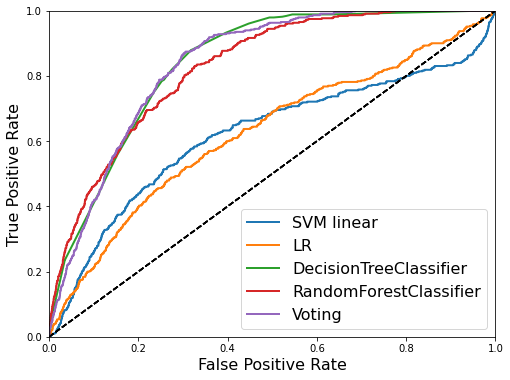

In [56]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
for name, model in models:
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()
    